**Real Estate Price Predictor**

In [133]:
import pandas as pd

In [134]:
housing = pd.read_csv("data.csv")

In [135]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [136]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [137]:
housing ["CHAS"].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [138]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [139]:
%matplotlib inline
import matplotlib.pyplot as plt

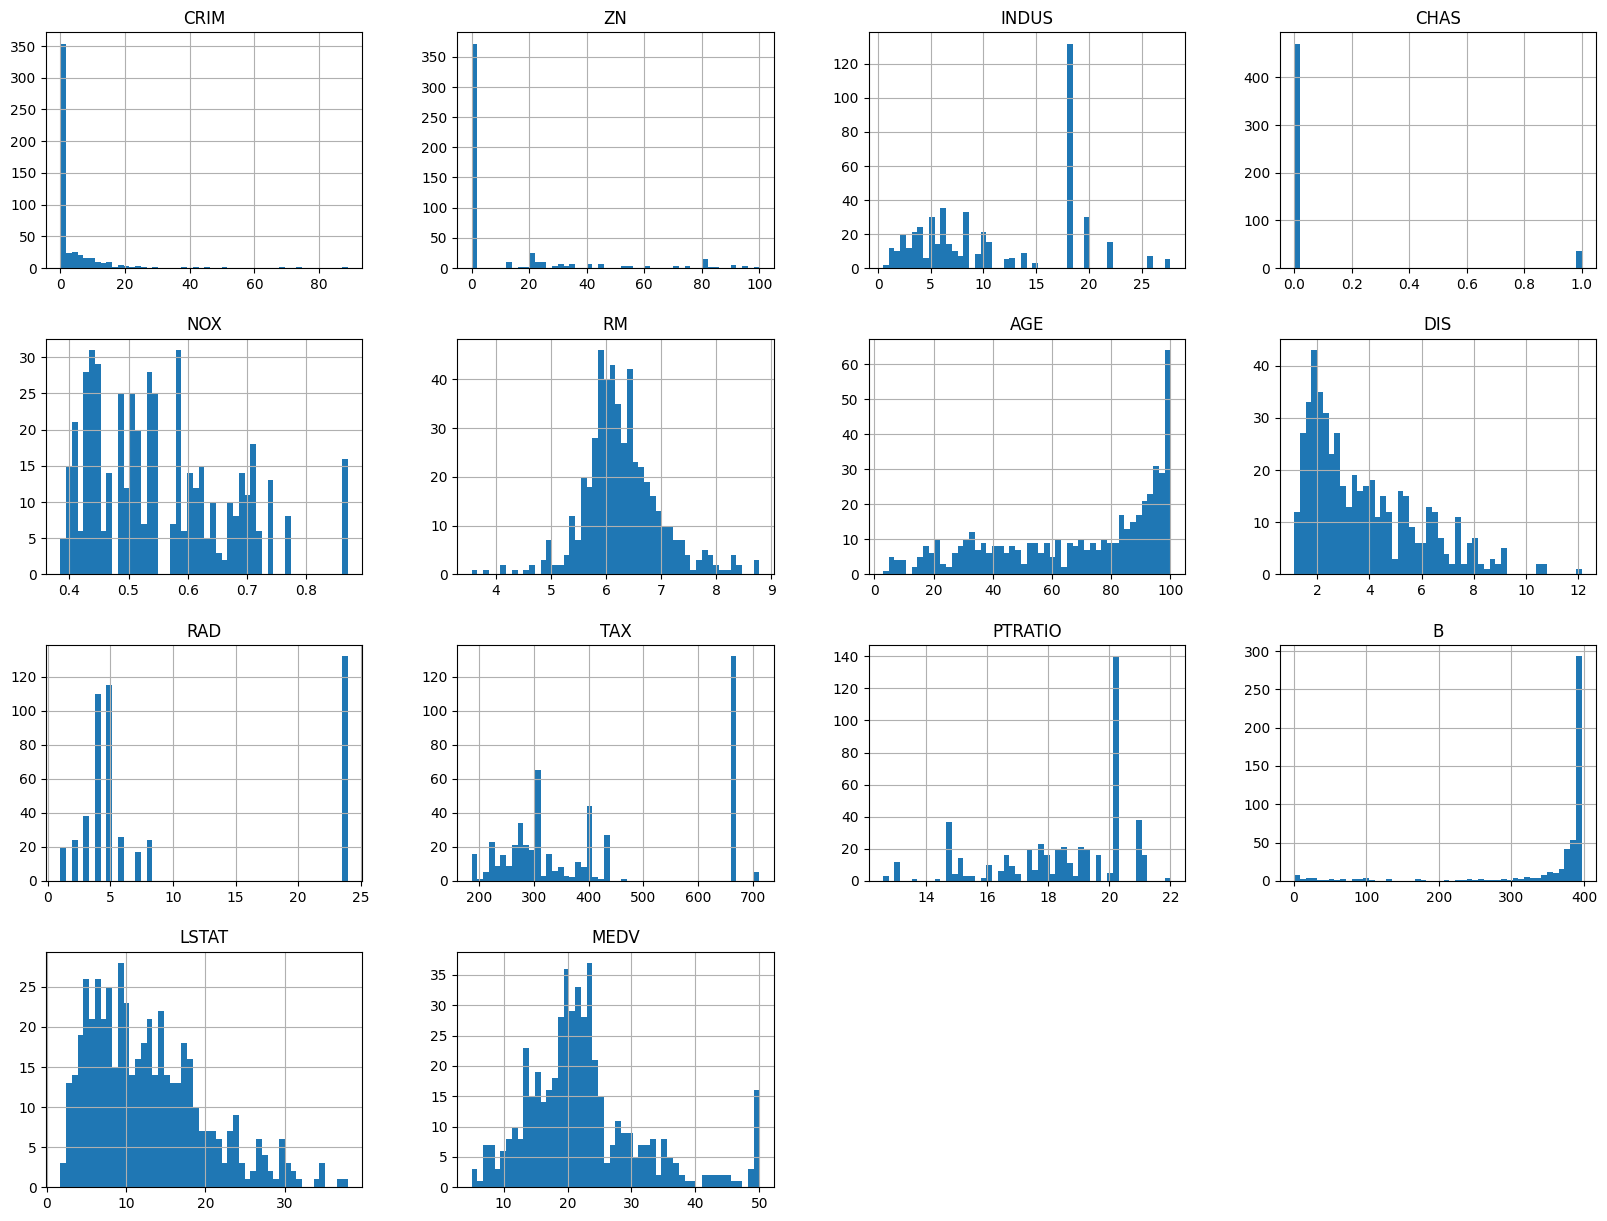

In [140]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

**Train Test Split**

In [141]:
import numpy as np
def split_train_test (data, test_ratio):
  shuffled = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled [:test_set_size]
  train_indices = shuffled [test_set_size:]
  return data.iloc [train_indices], data.iloc [test_indices]

In [142]:
train_set, test_set = split_train_test(housing,0.2)

In [143]:
print(f"Rows in train set: {len(train_set)} \nRows in test set: {len(test_set)}")

Rows in train set: 405 
Rows in test set: 101


In [144]:
# from sklearn.model_selection import train_test_split
# train_set, test_set = train_test_split(housing, test_size= 0.2, randmon_size=42)

In [145]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [146]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.303353,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314,22.625490
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.662996,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257,8.452344
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.000000
25%,0.057827,0.000000,4.950000,0.000000,0.448000,5.912750,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000,18.925000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.176000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000,21.500000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.539500,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500,25.000000
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [147]:
housing ["CHAS"].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

After using stratified shuffle split data equal amt of data is distributed in both train and test size to maintain same proportions

In [148]:
strat_train_set ["CHAS"].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [149]:
strat_test_set ["CHAS"].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [150]:
housing = strat_train_set.copy()

**Looking for correalations**

In [151]:
corr_matrix = housing.corr()

In [152]:
#  to check how medv is corelated with otherfeastures
corr_matrix ['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

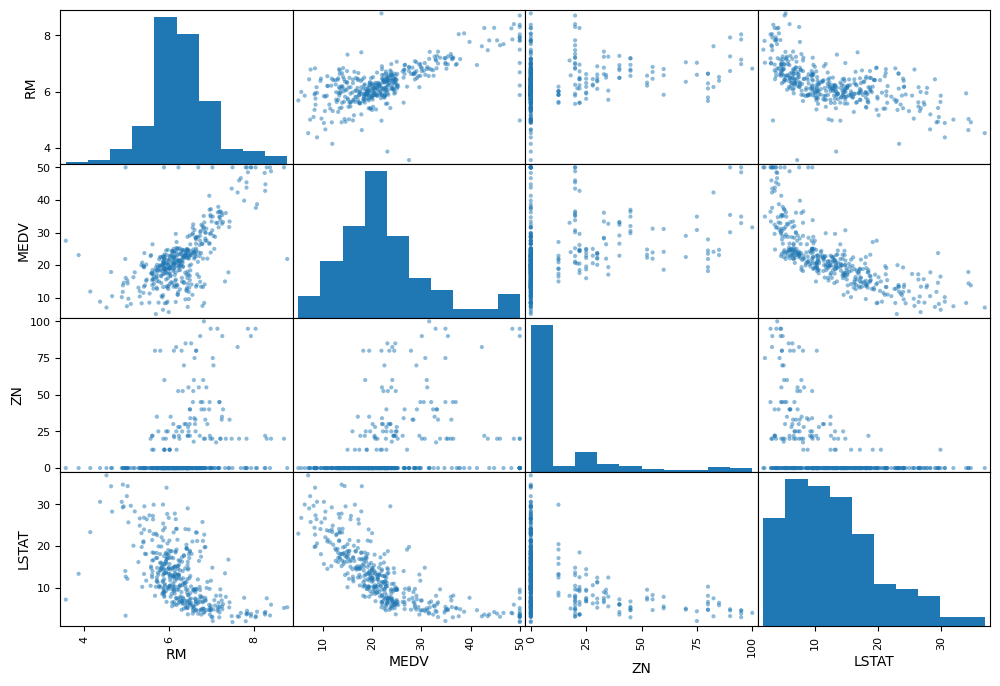

In [153]:
from pandas.plotting import scatter_matrix
attributes = ["RM", "MEDV", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize= (12,8))
plt.show()

<Axes: xlabel='RM', ylabel='MEDV'>

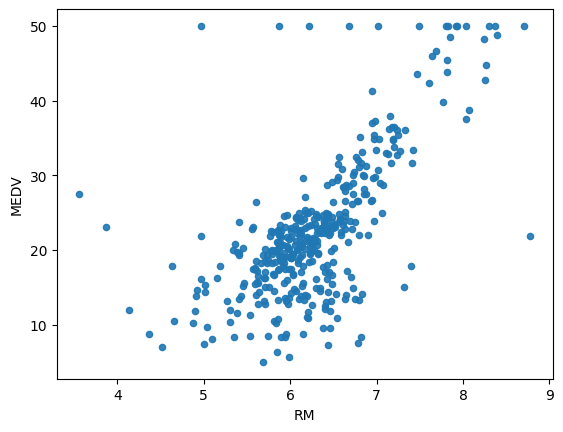

In [154]:
housing.plot(kind="scatter", x= "RM", y="MEDV", alpha=0.9)

**Attribute Combinations**

In [155]:
housing["TAXRM"] = housing['TAX']/housing['RM']

In [156]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [157]:
corr_matrix = housing.corr()
corr_matrix ['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.528626
LSTAT     -0.740494
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

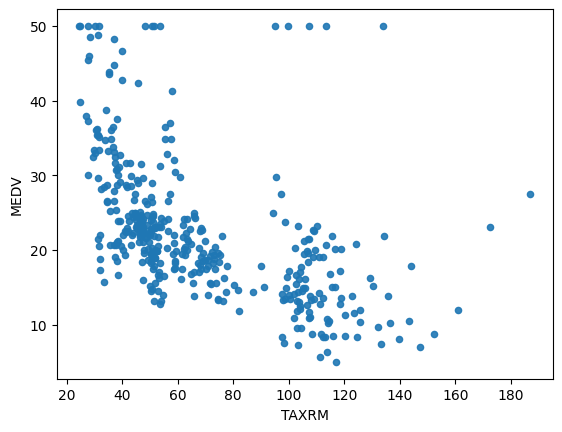

In [158]:
housing.plot(kind="scatter", x= "TAXRM", y="MEDV", alpha=0.9)

In [159]:
housing = strat_train_set.drop('MEDV', axis=1)
housing_labels = strat_train_set['MEDV'].copy()

In [160]:
# # Missing Attributes in RM
# To take care of missing values, you have three options
# 1. get rid of the missing data points
# 2. get rid of the attritube
# 3. set the value to some value (0, mean or median)
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279481,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716784,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.876500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [161]:
# option 1
a=housing.dropna(subset=['RM'])
a.shape

(399, 13)

In [162]:
# option 2
housing.drop('RM', axis=1).shape

(404, 12)

In [163]:
#option 3
median = housing['RM'].median()
housing['RM'].fillna(median)
housing.shape

(404, 13)

In [164]:
# if we have new test data as an input, it also can have missing values.
# So for that we use SimpleImputer to adjust that missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [165]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [166]:
X = imputer.transform(housing)

In [167]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [168]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


**Scikit-learn Design**

In [169]:
# Primary, three types of objects

# 1. Estimators- It estimates some parameter based on dataset. Eg.imputer
# It has a fit method (fits the dataset and calculates internal parameters) and transform method.

# 2. Transformers- It takes input and returns output based on learnings from fit().
# It also has a convienience function called fit_transform() which fits and then tranforms.

# 3. Predictors- Linearegression model is example of predictor. fit() and predict() are two common functions.
# It also gives score fn which will evaluate the predictions

**Feature Scaling**

In [170]:
# There are two types of feature scaling methods:

# 1. Min-max scaling
#     (value - min) / (max - min)
#     MinMaxScaler function is used.

# 2. Standardization
#     (value - mean) / std
#     StandardScaler function is used.

**Creating a Pipeline**

In [171]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('std_scalar', StandardScaler()),
])

In [172]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [173]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [192]:
housing_num_tr.shape

(404, 13)

**Select a desired model**

In [261]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# model = LinearRegression()
# model = Ridge(alpha=1.0)
# model = Lasso(alpha=0.1)
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
# model = GradientBoostingRegressor(n_estimators=100)
# model = xgb.XGBRegressor(n_estimators=100)
# model = SVR(kernel='rbf')
# model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500)

model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [262]:
some_data = housing.iloc[:5]

In [263]:
some_labels = housing.iloc[:5]

In [264]:
prepared_data = my_pipeline.transform(some_data)

In [265]:
model.predict(prepared_data)

array([22.319, 25.183, 16.417, 23.261, 23.636])

In [266]:
list(some_labels)

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

Evaluating the model

In [267]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [268]:
rmse

1.2647863407009745

**Using better evaluation technique - Cross Validation**

In [269]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [270]:
rmse_scores

array([2.7384926 , 2.9115754 , 4.34942047, 2.51646185, 3.51782069,
       2.63348642, 4.66609903, 3.32770843, 3.27897243, 3.06576956])

In [271]:
def print_scores(scores):
  print("Scores are:", scores)
  print("Mean:", scores.mean())
  print("Std deviation:", scores.std())

In [272]:
print_scores(rmse_scores)

Scores are: [2.7384926  2.9115754  4.34942047 2.51646185 3.51782069 2.63348642
 4.66609903 3.32770843 3.27897243 3.06576956]
Mean: 3.3005806890866047
Std deviation: 0.67789105351697


**Saving the model**

In [273]:
import joblib
from google.colab import files
joblib_filename = 'Nikhil.joblib'
joblib.dump(model, joblib_filename)

['Nikhil.joblib']

**Testing the model on test data**

In [274]:
X_test = strat_test_set.drop('MEDV', axis=1)
y_test = strat_test_set['MEDV'].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
# print(final_predictions, list(y_test))

In [275]:
final_rmse

2.912431116748329

In [276]:
prepared_data

array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
        -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
        -0.97491834,  0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, -0.27288841, -1.0542567 ,
         0.5009123 , -1.3938808 ,  2.19312325, -0.65766683, -0.78557904,
        -0.69277865,  0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, -0.27288841,  0.47919371,
         0.28867984,  0.87020968, -0.68730678,  1.63579367,  1.50571521,
         0.81196637,  0.44624347,  0.81480158],
       [-0.42292925, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.13688444, -0.52225911,  0.37882487, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.81939807],
       [-0.40786253, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.04693161, -1.42222622,  0.79643404, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.91902752]])

**Using the model**

In [277]:
from joblib import dump, load
model = load('Nikhil.joblib')
features = np.array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
        -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
        -0.97491834,  0.41164221, -66.86091034])
features = features.reshape(1, -1)
model.predict(features)

array([25.086])